1). Escriba una función que calcule el factorial de n, con n ∈ N y calcular los primeros 20 factoriales.

$n!=n(n-1)(n-2)...1$

In [ ]:
#FACTORIAL
def factorial_1 (numero):
    n= numero
    numero_= 0 
    multiplicacion = []
    while numero_ < numero:
      numero_= numero_+ 1
      multiplicacion.append(numero_)  
    
    factorial = 1

    for i in multiplicacion:
         factorial= factorial * i
    return factorial
  
numero= 20
numero_= 0 
multiplicacion = []

while numero_ < numero:
  numero_= numero_+ 1
  multiplicacion.append(numero_)

for i in multiplicacion:
  factorial = factorial_1(i)
  print("El factorial de ",i, "es:",factorial)

El factorial de  1 es: 1
El factorial de  2 es: 2
El factorial de  3 es: 6
El factorial de  4 es: 24
El factorial de  5 es: 120
El factorial de  6 es: 720
El factorial de  7 es: 5040
El factorial de  8 es: 40320
El factorial de  9 es: 362880
El factorial de  10 es: 3628800
El factorial de  11 es: 39916800
El factorial de  12 es: 479001600
El factorial de  13 es: 6227020800
El factorial de  14 es: 87178291200
El factorial de  15 es: 1307674368000
El factorial de  16 es: 20922789888000
El factorial de  17 es: 355687428096000
El factorial de  18 es: 6402373705728000
El factorial de  19 es: 121645100408832000
El factorial de  20 es: 2432902008176640000


2). Descargue los datos sobre el espector de una estrella y Diseñe un algoritmo
para encontrar todos los máximos locales en esta serie de datos.


In [ ]:
from csv import reader
import urllib.request
import numpy as np
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'

urllib.request.urlretrieve(url)
data = np.loadtxt(url)

graf = plt.figure(figsize=(15,5))
ax = graf.add_subplot(1,2,1)
graf.tight_layout()

datos_x= data[:,0]
datos_y= data[:,1]

lista_maximos_y= []
lista_maximos_x=[]

for i in range(1,len(data)-1):
    x=float(datos_x[i])
    y= float(datos_y[i])
    if y>float(datos_y[i-1]) and y>float(datos_y[i+1]):
      lista_maximos_y.append(y)
      lista_maximos_x.append(x)

max_x = np.array(lista_maximos_x)
max_y = np.array(lista_maximos_y)
values_x= np.array(datos_x)
values_y= np.array(datos_y)
ax.plot(values_x,values_y)
ax.scatter(max_x,max_y,color="r",marker="o")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3). La sucesión  de Fibonnaci está definida por la siguiente definición recurrente:

$f_0= 0$ ,
$f_1=1$ ,
$f_n=f_{n-1}+f_{n-2}$

a)Encontrar los primero 20 terminos de la succeción,
b)Graficar la sucesión de Fibonnaci,
c)El número aureo está dado por: $\phi=\frac{1+\sqrt{5}}{2}$
La sucesión de Fibonnaci se relaciona con este número de la siguiente forma:
$\phi=\lim_{n \to ∞}=\frac{f_{n+1}}{f_n}$, Usando la sucesión de números de Fibonnaci, calcular el número aureo y comparar con el valor exacto


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

primero= 0
segundo =1
contador = 1
fibonacci = [segundo]
iteracion = [1]

while contador < 20 : 
   nuevo = primero + segundo
   primero = segundo
   segundo = nuevo
   fibonacci.append(nuevo)
   iteracion.append(contador+1)
   contador +=1

X=np.array(iteracion)
Y=np.array(fibonacci)

#Aureo
número = (1 + np.sqrt(5))/2
aureo = np.full((20,1),número)
lista = fibonacci
aproximacion = [1]
for i in range(0,19):
   valor = lista[i+1]/lista[i]
   aproximacion.append(valor)

X1= X
y1= np.array(aproximacion)

fig= plt.figure(figsize=(10,5))
fig.tight_layout()
ax = fig.add_subplot(1,2,1)
ax.plot(X,Y,"k",label = "Serie fibonacci")
ax.legend()

ax1 = fig.add_subplot(1,2,2)
fig.tight_layout()
ax1.plot(X,aureo,"--",color="r",label="Número Aureo")
ax1.plot(X1,y1,label= "Estimación usando la serie")
ax1.legend()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5). Utilice el template de la clase partícula vista en clase para simular una colisión de duración
finita. Para la interacción de las dos partículas use la siguiente fuerza de contacto (Landau-Lifshitz volumen 7).

$f(x)= \left\{ \begin{array}{lcc}
             K= |\vec{r_1}-\vec{r_2}|^3*\vec{n} &  si  & |\vec{r_1}-\vec{r_2}| < R_1+R_2\\
             \\ 0 & en & otros&casos \\
             \end{array}
   \right.$

donde $R_1$ y $R_2$ son los radios de las esferar y $\vec{n}$ es el vector normal al plano de contacto Usar
 $K = 1 N/m^3$ , $m = 1 kg$ y $R1 = R2 = 2 m$. Usar las condiciones dadas para animar el movimiento de los dos objetos. Asimismo decir que significa físicamente $K$


In [ ]:
#Particula 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

def Distancia(x,y):
    dis = np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)
    return dis

class Particle:

    def __init__(self,ri,vi,ai,t,radius = 2,m=1,Id=0):
        self.dt = t[1] - t[0]

        self.r = ri
        self.v = vi
        self.a = ai

        self.R = np.zeros((len(t), len(ri)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
    
    def Evolution(self, i):
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
    
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetPosition(self, scale = 1):
        return self.R[::scale]
    
    def GetVelocity(self, scale = 1):
        return self.V[::scale]
    
    def CheckLimits(self, Limits):
        for i in range(2):
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
    
    def colisicion(self, self_, K=100):
        x1 = self.r[0]
        y1= self.r[1]
        x2= self_.r[0] 
        y2= self_.r[1]
        
        distancia = Distancia((x1, y1), (x2, y2))
            
        if distancia < (self.radius + self_.radius):
            Fuerza = K * abs(self.r - self_.r)**3
            self.v[0] = -1.0*self.v[0]
            self.v[1] = -1.0*self.v[1]
            if self_.v[0] == 0:
                self_.v[0] = 1.0*self.v[0]
            else:
                self_.v[0] = self_.v[0] + self.v[0]
            if self.v[1] == 0:
                self_.v[1] = 1.0*self.v[1]
            else:
                self_.v[1] = self_.v[1] + self.v[1]
        else:
            Fuerza = 0

limites = np.array([[-15., 15.], [-15., 15.]])
dt = 0.05
tmax = 10
t = np.arange(0., tmax, dt)

def RunSimulation(t, limites):

    walls2 = limites.copy()

    r10= np.array([-15., 1.])
    v10= np.array([10., 0.])
    a10= np.array([0., 0.])

    r20= np.array([0., -1.5])
    v20= np.array([0., 0.])
    a20= np.array([0., 0.])

    Info1 = Particle(r10, v10, a10, t)
    Info2 = Particle(r20, v20, a20, t)
    
    for it in tqdm(range(len(t)), desc='Running Simulation', unit='Steps'):
        sleep(0.0001)

        Info1.Evolution(it)
        Info1.CheckLimits(walls2)
        Info1.colisicion(Info2)

        Info2.Evolution(it)
        Info2.CheckLimits(walls2)
        Info2.colisicion(Info1)
    
    return [Info1, Info2]

time_scale = 1
t = t[::time_scale]

Particula1 = RunSimulation(t,limites)[0]
Particula2 = RunSimulation(t,limites)[1]

print(Particula1)
print(Particula2)


fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(limites[0][0], limites[0][1])
    ax.set_ylim(limites[1][0], limites[1][1])
    
def Update(i):

    ax.clear()
    init() 
    ax.set_title(r'$ t = %.2f \ s$' %(t[i]))
  
    x1 = Particula1.GetPosition(time_scale)[i, 0]
    y1 = Particula1.GetPosition(time_scale)[i, 1]
    vx1 = Particula1.GetVelocity(time_scale)[i, 0]
    vy1 = Particula1.GetVelocity(time_scale)[i, 1]

    p1 = plt.Circle((x1, y1), Particula1.radius, fill = True, color = 'k')
    ax.arrow(x1, y1, vx1*0.7, vy1*0.7, color = 'r', width = .3, head_width = 1, length_includes_head = True)
    ax.add_patch(p1)

    x2 = Particula2.GetPosition(time_scale)[i, 0]
    y2 = Particula2.GetPosition(time_scale)[i, 1]
    vx2 = Particula2.GetVelocity(time_scale)[i, 0]
    vy2 = Particula2.GetVelocity(time_scale)[i, 1]
    p2 = plt.Circle((x2, y2), Particula2.radius, fill = True, color = 'k')
    ax.arrow(x2, y2, vx2*0.7, vy2*0.7, color = 'r', width = .3, head_width = 1, length_includes_head = True)
    ax.add_patch(p2)
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)
Animation.save('Particula.mp4')

Running Simulation: 100%|██████████| 200/200 [00:00<00:00, 4266.32Steps/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


b). Físicamente $K$ hace referencia al peso especifico de las particulas la cual es una unidad que relaciona el peso del objeto en relacion con su volumen. 

5). $Teorico:$ Mostar que el operdador $D^4f$ está por $D^4f(x_j)\cong\frac{f(x_j+2)-4f(x_j+1)+6f(x_j)-4f(x_j-1)+f(x_j-2)}{h^4}$, señarlar el $(\mathcal{O}(h^k))$ en la aproximación: 

**Respuesta:** Para dar solución a este problema usaremos la noción de derivada progesiva vista en clase que parte de daber que:

$f'(x)=\frac{f(x+h)-f(x)}{h}$ y
$f''(x)=\frac{f(x+h)-2f(x)+f(x-h}{h^2}$

Gracias a la defición es la derivada, podemos expresar la cuarta derivada como:

$f^4(x)=\frac{f''(x_j+1)-2f´´(x_j)+f´´(x-1)}{h^4}$

ahora podemos remplazar ciertos terminos sabiendo la definicion de la derivada

$f''(x_j+1)=\frac{f(x_j+2)-2f(x_j+1)+f(x_j}{h^2}$
$f''(x_j-1)=\frac{f(x_j)-2f(x_j-1)+f(x_j-2}{h^2}$
$2f''(x_j)=\frac{2f(x_j+1)-4f(x_j)+2f(x_j-1}{h^2}$

Haciendo las sustituciones obtenemos que: 

$f^4(x)=\frac{\frac{f(x_j+2)-2f(x_j+1)+f(x_j}{h^2}-\frac{2f(x_j+1)-4f(x_j)+2f(x_j-1}{h^2}+\frac{2f(x_j+1)-4f(x_j)+2f(x_j-1}{h^2}}{h^4}$

los que es igual a 

$f^4=\frac{f(x_j+2)-4f(x_j+1)+6f(x_j)-4f(x_j-1)+f(x_j-2)}{h^4}$

De ahí decimos que la expresion inicial sale de realizar la cuarta derivada progresiva de la defición de derivada. Con respecto al orden $(\mathcal{O}(h^k))$ sabemos que por la definición misma de derivada esta dado por 

$f'(x)=\frac{f(x+h)-f(x)}{h}-\frac{h^2}{2f''(x)}$ y gracias a que aumenta progresivamente podemos concluir que $(\mathcal{O}(h^k))$ para $D^4$ es $(\mathcal{O}(h^2))$






6).Calcular el campo de velocidades cerca de la superficie de un cilindro de radio $R = 2cm$.

Text(0, 0.5, 'Eje de las y')

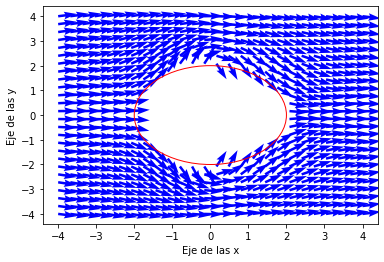

In [11]:
#derivadas problema (6)
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.function_base import meshgrid

#a
R=2
V=2
x= np.linspace(-4,4,26)
y= np.linspace(-4,4,26)

def funcion(x,y):
    f= V*x*(1- ((R**2)/((x**2)+(y**2))))
    return f

def Derivada_parcial_x(f,x,y,h=1e-3):  
    dx = (f(x+h,y) - f(x-h,y))/(2*h)
    return dx

def Derivada_parcial_y(f,x,y,h=1e-3):  
    dy=(f(x,y+h) - f(x,y-h))/(2*h)
    return dy

vx=np.zeros((26,26))
vy=np.zeros((26,26))
x= np.linspace(-4,4,26)
y= np.linspace(-4,4,26)

for i in range(26): 
    for j in range(26):
        vx[i,j]= Derivada_parcial_x(funcion,x[i],y[j])
        vy[i,j]= -Derivada_parcial_y(funcion,x[i],y[j])

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(26):
    for j in range(26):
        if x[i]**2 + y[j]**2>=2**2:  
            ax.quiver(x[i],y[j],vx[i,j],vy[i,j], color='b')

circulo = plt.Circle((0,0),2,color='r',fill=False)
ax.add_patch(circulo)
plt.xlabel('Eje de las x')
plt.ylabel('Eje de las y')


7). Calcular todas las raíces reales de: $3x^5+5x^4-x^3$


[-1.8471 -0.      0.1805]


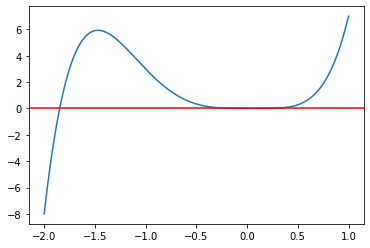

In [12]:
#Metodo NewtonRaphson
import numpy as np 
import matplotlib.pyplot as plt

def funcion(x):
  return 3*(x**5)+5*(x**4)-(x**3)

def df (f,x,h=1e-4):
  return (f(x+h)-f(x-h))/(2*h)

def MedNewtonRaphson (f,df,x0,Toleracia=1e-5,itmax=100): 
   error= 1
   it=0
   while error > Toleracia and it<=itmax:
     x = x0-f(x0)/df(f,x0)
     error = np.abs(f(x0)/df(f,x0))
     x0=x
     it+=1
    
   if it==itmax:
     False

   else:
     return x

def Conjunto_raices(x,precision=4):
   raices= []
   dan= np.array([])
   conjunto= []

   for i in x:
     raiz = MedNewtonRaphson(funcion,df,i)
     
     if raiz != False:
       n_raiz= np.round(raiz, precision)
       conjunto.append(n_raiz)

       if n_raiz not in raices:
         raices = np.append(raices,n_raiz)

   raices.sort()
   return raices


x = np.linspace(-2,1,1000)
y = funcion(x)

plt.plot(x,y)
plt.axhline(y=0,color="r")

todas_raices= Conjunto_raices(x)

print(todas_raices)